In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv('titanic_toy.csv')

In [6]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [11]:
x=df.drop(columns=["Survived"])

In [12]:
y=df["Survived"]

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [14]:
x_test

,Age,Fare,Family
494,21.0,8.0500,0
782,29.0,30.0000,0
223,NaN,7.8958,0
219,30.0,10.5000,0
325,36.0,135.6333,0
...,...,...,...
271,25.0,NaN,0
62,45.0,83.4750,1
609,40.0,153.4625,0
589,NaN,8.0500,0


In [17]:
age_mean=x_train["Age"].mean()

In [18]:
age_median=x_train["Age"].median()

In [19]:
x_train["age_median"]=df["Age"].fillna(age_median)

In [20]:
x_train

,Age,Fare,Family,age_median
0,22.0,7.2500,1,22.0
311,18.0,262.3750,4,18.0
859,NaN,7.2292,0,29.0
793,NaN,30.6958,0,29.0
153,40.5,14.5000,2,40.5
...,...,...,...,...
309,30.0,56.9292,0,30.0
774,54.0,23.0000,4,54.0
379,19.0,7.7750,0,19.0
148,36.5,26.0000,2,36.5


In [21]:
x_train["age_mean"]=df["Age"].fillna(age_mean)

In [22]:
x_train

,Age,Fare,Family,age_median,age_mean
0,22.0,7.2500,1,22.0,22.000000
311,18.0,262.3750,4,18.0,18.000000
859,NaN,7.2292,0,29.0,29.807263
793,NaN,30.6958,0,29.0,29.807263
153,40.5,14.5000,2,40.5,40.500000
...,...,...,...,...,...
309,30.0,56.9292,0,30.0,30.000000
774,54.0,23.0000,4,54.0,54.000000
379,19.0,7.7750,0,19.0,19.000000
148,36.5,26.0000,2,36.5,36.500000


In [23]:
x_test

,Age,Fare,Family
494,21.0,8.0500,0
782,29.0,30.0000,0
223,NaN,7.8958,0
219,30.0,10.5000,0
325,36.0,135.6333,0
...,...,...,...
271,25.0,NaN,0
62,45.0,83.4750,1
609,40.0,153.4625,0
589,NaN,8.0500,0


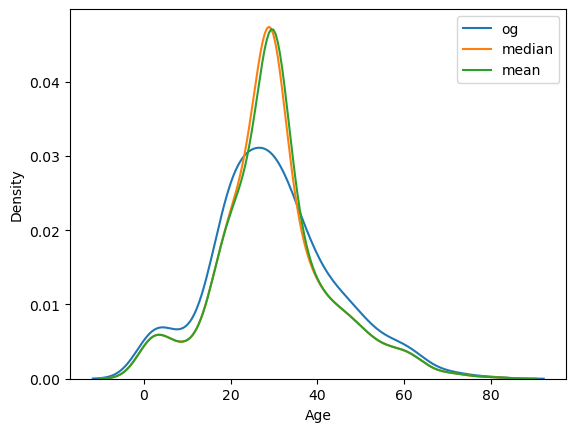

In [27]:
sns.kdeplot(data=x_train,x='Age',label='og')
sns.kdeplot(data=x_train,x='age_median',label='median')
sns.kdeplot(data=x_train,x='age_mean',label='mean')
plt.legend()

In [30]:
df1=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [31]:
df1

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [36]:
df1.isnull().mean()*100
a=df1["GarageQual"].value_counts().index[0]

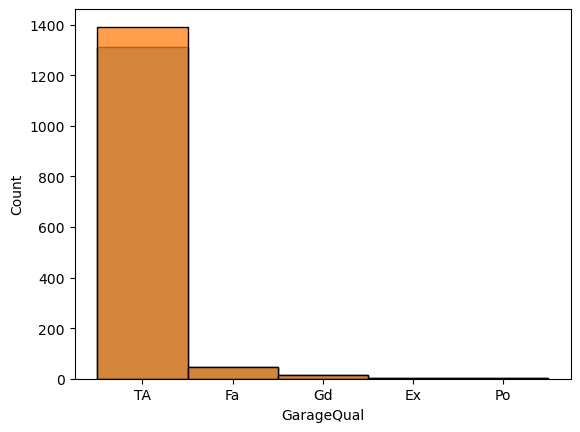

In [38]:
df1["GarageQual_mode"]=df1["GarageQual"].fillna(a)
df1["GarageQual_mode"].value_counts()
sns.histplot(df1["GarageQual"])
sns.histplot(df1["GarageQual_mode"])
df1.drop(columns=["GarageQual"],inplace=True)

In [39]:
df2=pd.read_csv('covid_toy.csv')
df2

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [60]:
df2["age"]
imputer=SimpleImputer(strategy="mean")
a=imputer.fit_transform(pd.DataFrame(df2['age']))
a

array([[60.],
       [27.],
       [42.],
       [31.],
       [65.],
       [84.],
       [14.],
       [20.],
       [19.],
       [64.],
       [75.],
       [65.],
       [25.],
       [64.],
       [51.],
       [70.],
       [69.],
       [40.],
       [64.],
       [42.],
       [12.],
       [73.],
       [71.],
       [80.],
       [13.],
       [23.],
       [19.],
       [33.],
       [16.],
       [34.],
       [15.],
       [83.],
       [34.],
       [26.],
       [74.],
       [82.],
       [38.],
       [55.],
       [49.],
       [50.],
       [49.],
       [82.],
       [27.],
       [22.],
       [20.],
       [72.],
       [19.],
       [18.],
       [66.],
       [44.],
       [19.],
       [11.],
       [47.],
       [83.],
       [60.],
       [81.],
       [71.],
       [49.],
       [23.],
       [ 6.],
       [24.],
       [81.],
       [56.],
       [10.],
       [42.],
       [69.],
       [51.],
       [65.],
       [54.],
       [73.],
       [68.],
      

In [61]:
from sklearn.impute import SimpleImputer

In [71]:
df2.isnull().mean()

age          0.0
gender       0.0
fever        0.1
cough        0.0
city         0.0
has_covid    0.0
dtype: float64

In [63]:
x=df2.drop(columns=["has_covid"])

In [64]:
y=df2["has_covid"]

In [65]:
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [66]:
x_train

,age,gender,fever,cough,city
10,75,Female,NaN,Mild,Delhi
71,75,Female,104.0,Strong,Delhi
57,49,Female,99.0,Strong,Bangalore
79,48,Female,103.0,Mild,Kolkata
42,27,Male,100.0,Mild,Delhi
...,...,...,...,...,...
1,27,Male,100.0,Mild,Delhi
53,83,Male,98.0,Mild,Delhi
21,73,Male,98.0,Mild,Bangalore
97,20,Female,101.0,Mild,Bangalore


In [67]:
y_train

10     No
71     No
57     No
79    Yes
42    Yes
     ... 
1     Yes
53    Yes
21    Yes
97     No
91    Yes
Name: has_covid, Length: 75, dtype: object

In [125]:
df2["fever"]
imputer=SimpleImputer(strategy="mean")
new_fever=imputer.fit_transform(pd.DataFrame(x_train['fever']))
new_fever

array([[100.86764706],
       [104.        ],
       [ 99.        ],
       [103.        ],
       [100.        ],
       [ 99.        ],
       [100.        ],
       [104.        ],
       [100.86764706],
       [101.        ],
       [104.        ],
       [103.        ],
       [101.        ],
       [ 98.        ],
       [102.        ],
       [102.        ],
       [101.        ],
       [100.86764706],
       [103.        ],
       [104.        ],
       [100.        ],
       [101.        ],
       [ 98.        ],
       [ 98.        ],
       [ 99.        ],
       [103.        ],
       [100.86764706],
       [104.        ],
       [ 98.        ],
       [100.        ],
       [ 98.        ],
       [ 99.        ],
       [102.        ],
       [101.        ],
       [101.        ],
       [ 99.        ],
       [104.        ],
       [104.        ],
       [102.        ],
       [104.        ],
       [104.        ],
       [ 99.        ],
       [100.        ],
       [ 98

In [118]:
age=x_train[['age']].values

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
ohe = OneHotEncoder(sparse_output=False,drop="first")  
x_train_new = ohe.fit_transform(x_train[['city','gender']])

In [96]:
x_train_new.shape

(75, 4)

In [97]:
x_test_new = ohe.transform(x_test[['city','gender']])

In [98]:
x_test_new.shape

(25, 4)

In [112]:
x_train_new = ohe.fit_transform(x_train[['city','gender']])

In [110]:
from sklearn.preprocessing import OrdinalEncoder

In [103]:
oe= OrdinalEncoder(categories=[['Mild','Strong']])
x_train_cough=oe.fit_transform(x_train[['cough']])
x_test_cough=oe.transform(x_test[['cough']])
x_train_cough.shape

(75, 1)

In [114]:
x_train['age']

10    75
71    75
57    49
79    48
42    27
      ..
1     27
53    83
21    73
97    20
91    38
Name: age, Length: 75, dtype: int64

In [128]:
x_train_transformed = np.concatenate((new_fever,x_train_cough,x_train_new,age),axis=1)
x_train_transformed.shape

(75, 7)

In [ ]:
from sklearn.compose import ColumnTransformer

In [130]:
transformer = ColumnTransformer (transformers=[
    ('tnf1',SimpleImputer(strategy="median"), ['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3', OneHotEncoder (sparse_output=False, drop='first'), ['gender', 'city'])
], remainder= 'passthrough')

In [137]:
transformer.fit_transform(x_train).shape

(75, 8)

In [138]:
x_train

,age,gender,fever,cough,city,age_mean
10,75,Female,NaN,Mild,Delhi,75
71,75,Female,104.0,Strong,Delhi,75
57,49,Female,99.0,Strong,Bangalore,49
79,48,Female,103.0,Mild,Kolkata,48
42,27,Male,100.0,Mild,Delhi,27
...,...,...,...,...,...,...
1,27,Male,100.0,Mild,Delhi,27
53,83,Male,98.0,Mild,Delhi,83
21,73,Male,98.0,Mild,Bangalore,73
97,20,Female,101.0,Mild,Bangalore,20


In [140]:
df3=pd.read_csv('train.csv')
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [147]:
x = df3.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [148]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [154]:
ohe = OneHotEncoder(sparse_output=False, drop="first")  
x_train_new = ohe.fit_transform(df3[['Sex','Embarked']])

In [155]:
x_train_new.shape

(891, 4)